In [1]:
%matplotlib inline

In [2]:
from __future__ import division

In [3]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="darkgrid")

#import matplotlib
#matplotlib.style.use('ggplot')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)

# Statistical Inference

## Contents
1. [Introduction](#Introduction)
2. [Bayesian Approach to Statistical Inference](#Bayesian-Approach-to-Statistical-Inference)
    1. [Grid Method](#Grid-Method)
    2. [Exact Method](#Exact-Method)
    3. [Monte Carlo Method](#Monte-Carlo-Method)
        1. [Monte Carlo Simulation](#Monte-Carlo-Simulation)
        2. [Markov Chain Monte Carlo Simulation](#Markov-Chain-Monte-Carlo-Simulation)
    4. [Bootstrap Methods](#Bootstrap-Methods)
    5. [Reporting in Bayesian Inference](#Reporting-in-Bayesian-Inference)
3. [Common Problems in Statistical Inference](#Common-Problems-in-Statistical-Inference)
    1. [Comparing two boolean $\theta$s](#Comparing-two-boolean-$\theta$s)
    2. [Comparing two real valued $\theta$s](#Comparing-two-real-valued-$\theta$s)
    3. [Comparing a boolean $\theta$ with a hypothesized value](#Comparing-a-boolean-$\theta$-with-a-hypothesized-value)
    4. [Comparing a real valued $\theta$ with a hypothesized value](#Comparing-a-real-valued-$\theta$-with-a-hypothesized-value)
4. [Summary](#Summary)

## [Introduction](#Contents)

In the module on Probability, we talked about the probability of an event based on a particular probability distribution. The typical examples are things like, given a fair coin, what is the probability of seeing 6 heads and 4 tails in 10 tosses? This a *deductive* question. If we have $\theta=0.5$ as the probability of heads and we have 10 tosses, then we can use the binomial distribution to calculate that the probability of 6 heads and 4 tails is 20.5%.

If, on the other hand, we'd like to know what the value of $\theta$ is when we observe 6 heads and 4 tails in 10 tosses, our task is not as easy. Why? Because many values of $\theta$ are consistent with 6 heads and 4 tails in 10 tosses. The following table shows the probability of that outcome for different values of $\theta$ in 0.1 increments:

| $\theta$ | probability |
|:--------:|------------:|
| 0.1      | 0.01%       |
| 0.2      | 0.55%       |
| 0.3      | 3.67%       |
| 0.4      | 11.14%      |
| 0.5      | 20.5%       |
| 0.6      | 25.08%      |
| 0.7      | 20.01%      |
| 0.8      | 8.80%       |
| 0.9      | 1.11%       |

so which $\theta$ is it? We don't know for certain. Actually, we cannot know for certain merely from the data.

This is the central problem of statistical inference. Answering it requires *induction* (or *abduction*). Because the answers are uncertain, it turns out there are a variety of approaches to answering it. Two of the major approaches are known as Bayesian and Frequentist. We will discuss the Bayesian approach now and talk a bit about the Frequentist approach later.

## [Bayesian Approach to Statistical Inference](#Contents)

In order to describe the Bayesian approach, we start with conditional probability. In the previous module on probability, we started with joint probability in order to explain conditional probability. We talked about the joint probability of the events $C$, community, and $I$, income, $P(C, I)$:

| area | low | high |
|:----:|:---:|:----:|
| rural | 0.04 | 0.02 |
|suburban | 0.19 | 0.22 |
|urban | 0.29 | 0.24 |

And then we conditioned on one or the other variable, say "Income" as $P(C | I)$:

| area | low | high |
|:----:|:---:|:----:|
| rural | 0.08 | 0.05 |
|suburban | 0.37 | 0.46 |
|urban | 0.55 | 0.50 |

In order to motivate the explanation of statistical inference using probability theory, we're going to take $C$, community, to be our unobservable parameter, $\theta$. What we observe is the data, $D$ or Income. In this case, the above table becomes $P(\theta | D)$.

In this problem domain, the *forward* probability question would be: given a rural community, what is the probability of low income? If we assume $D=low$, just like we might assume a coin is fair, we can calculate the probabilities of the events covered by $P(D|\theta=low)$.

The *inverse* probability question is: given actual data, an observation for an event $D=low$ what is the probability for each possible $\theta$? This is the Bayesian answer to the problem of statistical inference. We can't say for certain what the value of $\theta$ so we use probability as a model of our uncertainty over its possible values. We can see these in the table above. We observed $D=low$ and we can see the probability distribution over $\theta$:

| area | **low** | high |
|:----:|:---:|:----:|
| rural | **0.08** | 0.05 |
| suburban | **0.37** | 0.46 |
| urban | **0.55** | 0.50 |

The challenge is that we very rarely know *this* information directly. Just as with the coin example, we might know the $P(D|\theta)$ instead:

| area | $D=low$ | $D=high$ |
|:----:|:---:|:----:|
| $\theta=rural$ | 0.65 | 0.35 |
| $\theta=suburban$ | 0.46 | 0.54 |
| $\theta=urban$ | 0.54 | 0.46 |

this is the same situation we had with the coin. If we have a suburban community (a fair coin), we know the probability of it being either low income or high income (heads or tails). But we have the outcome, we know the community has low income, what is the probability of each of the possible community types? What we want to know is $P(\theta|D)$...we have a rule for that:

$$P(\theta|D) = \frac{P(D|\theta)P(\theta)}{P(D)}$$

which is Bayes Rule. The use of Bayes Rule is how this approach got its original name, inverse probability. Instead of moving from parameters to data, we move from data to parameters. Of course, this doesn't precisely solve the problem. We need to get $P(D|\theta)$ and $P(\theta)$.

There are different ways to do this,

1. Grid Method
2. Exact Method
3. Monte Carlo Method
4. Bootstrap Methods

The Exact Method involves parameterizing mathematical functions that represent the likelihood and prior and multiplying them together exactly as described in Bayes Rule. The math often becomes intractable except for the simplest of problem. This was one of the great obstacles to the practical application of Bayesian statistical inference. With the advent of the modern computer, this is no longer the case. Why?

The Monte Carlo Method involves paramterizing mathematical functions as with the exact method but instead of trying to find an analytical solution for the posterior distribution, we *simulate* events from these distributions and construct a posterior distribution for our parameter which we can analyze.

With a renewed interest in Bayesian estimation, research has deepened our understanding of statistical inference which lead to the development of Bootstrap Methods (both parameteric and non-parameteric) which use the data themselves to represent key statistical distributions. In fact, the Non-Parametric Bootstrap Method goes so far as to say that the data themselves represent a sampling of the posterior distribution.

We will discuss each of these methods in turn although we will concentrate on the Grid, Monte Carlo and Non-Parametric Bootstrap Methods.

### [Grid Method](#Contents)

We start out with an article that appeared in the Guardian on Friday, January 4, 2002:

"When spun on edge 250 times, a Belgian one-euro coin came up heads 140 times and tails 110. 'It looks very suspicious to me,' said Barry Blight, a statistics lecturer at the London School of Economics. 'If the coin were unbiased, the chance of getting a result as extreme as that would be less than 7%.'

Let us ignore the final statement for the moment and concentrate on the actual problem.

To start, we know all of the possible values that $\theta$ could *possibly* take $[0.0, 1.0]$ even before we flip the coin. Each possible value of $\theta$ is an event--just like all possible results when two six-sided dice are thrown--and we can assign probabilities to those events. What is the probability of $P(\theta=0.5)$? $P(\theta=0.51)$?

The main differences here are:

1. we're assigning probabilities to unobservables, unlike the die coming up 2, we will never observe $\theta$. and,
2. there are infinitely many of them. 

The first is just a restatement of the problem of statistical inference and the second can be handled in a number of ways from using probability *functions* instead of tables or discretization. We probably don't care about the difference between $\theta=0.52$ and $\theta=0.53$ so we can probably look at some fairly general values of $\theta$, say, increments of $0.05$.

Next, we have some data, $D=\{H: 140, T:110\}$ and we want to know how this data should change the probability distributino over $\theta$, our beliefs in the possible values of $\theta$. 

When we are done, we will have posterior probability assignments to those values of $\theta$ that reflect our original beliefs and the data or evidence. What we'll need to do then is decide what that means. For example, if there is a "high" probability around $\theta=0.3$ do we decide the coin is biased towards tails? It is usual to define a set of values for $\theta$ that we might consider to be equivalent. For this problem, let's say that $\theta$ in the range $[0.45, 0.55]$ indicates a "fair" coin.

Our recipe is basically:

1. Assign prior probabilities.
2. Collect data and calculate likelihoods.
3. Combine priors and likelihoods to calculate posterior probabilities.

Sometimes we can get to do all three at once, as we will see later.

Taking the Belgian Euro problem, let's start by assigning a prior probability to all of these values of $\theta$. At it's core, the Grid Method is a method of approximation. We are basically going to calculate, brute force, Bayes Rule for a finite set of values of $\theta$ and use that as an approximation of the whole continuous space of possibilities. So that's the first question, what should the grid look like? How fine a resolution should it have? How about every 0.05?

In [4]:
thetas = [i * 0.05 for i in xrange( 0, 21)]
print thetas

[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.9, 0.9500000000000001, 1.0]


Given these values of $\theta$, what prior probabilities should we assign to them? Is it very unlikely that the value of $\theta=0.0$...I mean it *could* happen What about $\theta=1.0$? Also unlikely...although the coin could be a gag coin from a magic shop. So we shouldn't rule them out. This is know as Cromwell's Rule,

> I pray beseech you in the bowels of Christ, please consider that you might be wrong.

Don't ask.

The *prior* probability distribution for $\theta$ should encode this knowledge. In general, the only requirement is that we not rule out anything that is possible no matter how improbable. We can just assign a very low probability to it.


So what kind of prior do we want? We generally believe coins are fair unless we have some reason to believe they're not (they look suspicious and may have come from a magic shop, perhaps because they have The Riddler as the "heads"). But if someone pulls out a random Euro from their pocket, we tend to think, "oh, a fair coin" even if "fair" has a somewhat fuzzy notion.

We can use a triangle shaped distribution to model these beliefs...most of the probability will be around $\theta=0.5$ and the rest will taper off towards $\theta=0.0$ and $\theta=1.0$.

In [5]:
priors = [11 - abs( 10 - i) for i in xrange( 0, 21)]
normalizer = sum( priors)
priors = [ x / normalizer for x in priors]
for t, p in zip( thetas, priors):
    print t, p

0.0 0.00826446280992
0.05 0.0165289256198
0.1 0.0247933884298
0.15 0.0330578512397
0.2 0.0413223140496
0.25 0.0495867768595
0.3 0.0578512396694
0.35 0.0661157024793
0.4 0.0743801652893
0.45 0.0826446280992
0.5 0.0909090909091
0.55 0.0826446280992
0.6 0.0743801652893
0.65 0.0661157024793
0.7 0.0578512396694
0.75 0.0495867768595
0.8 0.0413223140496
0.85 0.0330578512397
0.9 0.0247933884298
0.95 0.0165289256198
1.0 0.00826446280992


In [6]:
def belief_plot( axes, xs, ys, color):
    n = len( xs)
    margin = 0.05 * max( xs)
    min_x, max_x = min( xs) - margin, max( xs) + margin
    min_y, max_y = 0.0, max( ys) * 1.1

    axes.vlines( xs, [0.0] * n, ys, color=color, alpha=0.8, linewidth=5)
    axes.set_xlim( [ min_x, max_x])
    axes.set_ylim( [ 0.0, 1.0])
    
    return axes

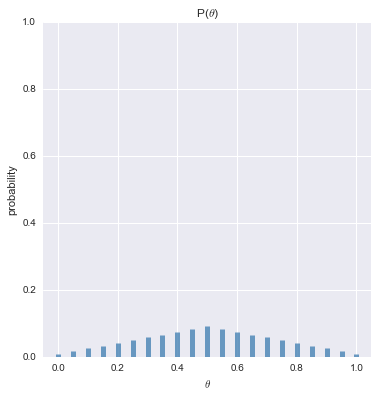

In [7]:
figure = plt.figure(figsize=(20,6))

axes = figure.add_subplot(1, 3, 1)

axes = belief_plot( axes, thetas, priors, "steelblue")

axes.set_title( r"P($\theta$)")
axes.set_xlabel( r"$\theta$")
axes.set_ylabel( "probability")

For our likelihood, we need to calculate the probability of each of our $\theta$s for the observed data, 140 heads and 110 tails. We can do this with the Binomial Distribution:

$$X \sim B(k; n, p) = \binom{n}{k}p^k(1-p)^{n-k}$$

Let's change this to match our problem by turning $p$ into $\theta$:

$$X \sim B(k; n, \theta) = \binom{n}{k}\theta^k(1-\theta)^{n-k}$$

except that we will keep $k$ and $n$ constant (we know these values) and vary $\theta$. Basically, for each value of $\theta$ in our grid, what was the probability of seeing the data, $P(D|\theta)$?

In [8]:
likelihoods = [stats.binom.pmf( 140, 250, x) for x in thetas]
normalizer = sum( likelihoods)
likelihoods = [ x / normalizer for x in likelihoods]
for t, l in zip( thetas, likelihoods):
    print t, l

0.0 0.0
0.05 4.82601604222e-111
0.1 1.75738781448e-71
0.15 1.46909428331e-49
0.2 5.78481579685e-35
0.25 1.76413476939e-24
0.3 1.08630464039e-16
0.35 7.38222048527e-11
0.4 1.45622304821e-06
0.45 0.00147176796373
0.5 0.104879994621
0.55 0.60582140924
0.6 0.279232311974
0.65 0.00858116753305
0.7 1.18920080238e-05
0.75 3.63219704837e-10
0.8 6.66943853237e-17
0.85 5.84628076782e-27
0.9 7.44977049945e-43
0.95 1.11223559517e-72
1.0 0.0


It is not strictly necessary to normalize the likelihoods because the constant drops out when we normalize at the end. However, it does permit us to demonstrate the differences in the strengths of the prior distribution and the likelihood.

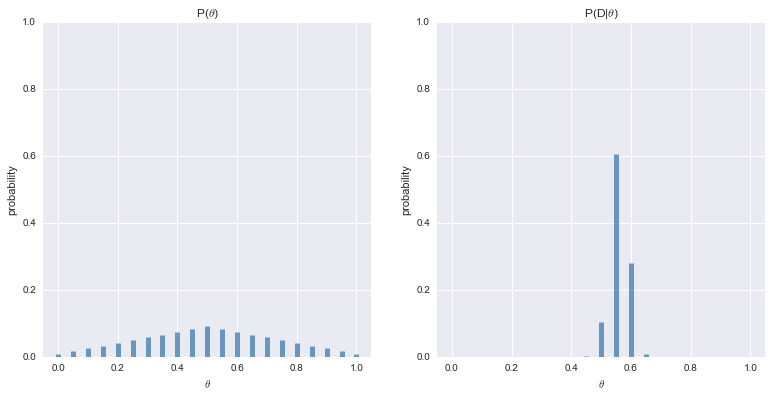

In [9]:
figure = plt.figure(figsize=(20,6))

axes = figure.add_subplot(1, 3, 1)

axes = belief_plot( axes, thetas, priors, "steelblue")
axes.set_title( r"P($\theta$)")
axes.set_xlabel( r"$\theta$")
axes.set_ylabel( "probability")

axes = figure.add_subplot(1, 3, 2)

axes = belief_plot( axes, thetas, likelihoods, "steelblue")
axes.set_title( r"P(D|$\theta$)")
axes.set_xlabel( r"$\theta$")
axes.set_ylabel( "probability")

At this point, the problem is not any different than we saw in the Applied Probability module. We are essentially multiplying the prior and likelihood for each value of $\theta$ the same way we multipled for each value of factory. We then normalize:

In [10]:
posteriors = [ p * l for p, l in zip(priors, likelihoods)]
normalizer = sum( posteriors)
posteriors = [ x / normalizer for x in posteriors]
for t, p in zip( thetas, posteriors):
    print t, p

0.0 0.0
0.05 9.84052917864e-112
0.1 5.37512492145e-72
0.15 5.99113846064e-50
0.2 2.94889449931e-35
0.25 1.07915221508e-24
0.3 7.7526356025e-17
0.35 6.02111186146e-11
0.4 1.33619581287e-06
0.45 0.00150051051059
0.5 0.117621046234
0.55 0.617652656199
0.6 0.25621696246
0.65 0.00699900114355
0.7 8.48697514151e-06
0.75 2.22187871265e-10
0.8 3.39984388307e-17
0.85 2.38418173413e-27
0.9 2.27857771294e-43
0.95 2.26791347812e-73
1.0 0.0


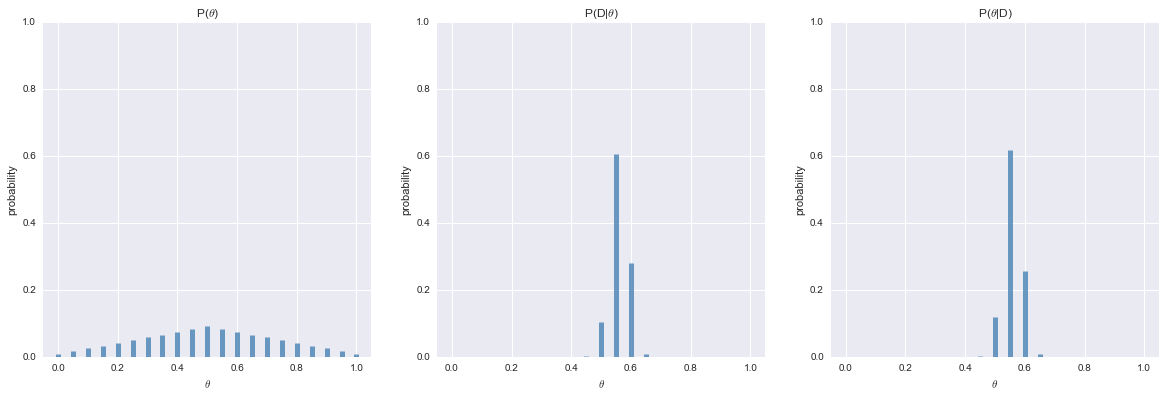

In [11]:
figure = plt.figure(figsize=(20,6))

axes = figure.add_subplot(1, 3, 1)

axes = belief_plot( axes, thetas, priors, "steelblue")
axes.set_title( r"P($\theta$)")
axes.set_xlabel( r"$\theta$")
axes.set_ylabel( "probability")

axes = figure.add_subplot(1, 3, 2)

axes = belief_plot( axes, thetas, likelihoods, "steelblue")
axes.set_title( r"P(D|$\theta$)")
axes.set_xlabel( r"$\theta$")
axes.set_ylabel( "probability")

axes = figure.add_subplot(1, 3, 3)

axes = belief_plot( axes, thetas, posteriors, "steelblue")
axes.set_title( r"P($\theta$|D)")
axes.set_xlabel( r"$\theta$")
axes.set_ylabel( "probability")

When we're done, we see that there is roughly a 73.7% probability that the coin is "fair" as we defined it:

| $\theta$ | probability |
|:------:|:-----------:|
| 0.45 | 0.00150051051059 |
| 0.50 | 0.117621046234 |
| 0.55 | 0.617652656199 |

that may or may not be decisive for our purposes. One thing we may want to do is check to see how our prior influences the result. The current prior is not particularly strong in the direction of an unbiased coin. What if we did something stronger?

priors
0.0 0.0263157894737
0.05 0.0263157894737
0.1 0.0263157894737
0.15 0.0263157894737
0.2 0.0263157894737
0.25 0.0263157894737
0.3 0.0263157894737
0.35 0.0263157894737
0.4 0.0263157894737
0.45 0.131578947368
0.5 0.263157894737
0.55 0.131578947368
0.6 0.0263157894737
0.65 0.0263157894737
0.7 0.0263157894737
0.75 0.0263157894737
0.8 0.0263157894737
0.85 0.0263157894737
0.9 0.0263157894737
0.95 0.0263157894737
1.0 0.0263157894737
posteriors
0.0 0.0
0.05 1.10357049735e-111
0.1 4.01863841211e-72
0.15 3.3593943632e-50
0.2 1.32282031186e-35
0.25 4.03406674952e-25
0.3 2.48406499643e-17
0.35 1.68810063233e-11
0.4 3.32996156564e-07
0.45 0.00168275414909
0.5 0.23983025919
0.55 0.692669303266
0.6 0.0638523657416
0.65 0.00196226519752
0.7 2.71935880332e-06
0.75 8.30578570004e-11
0.8 1.52510798428e-17
0.85 1.33687557567e-27
0.9 1.70354736978e-43
0.95 2.54336160136e-73
1.0 0.0


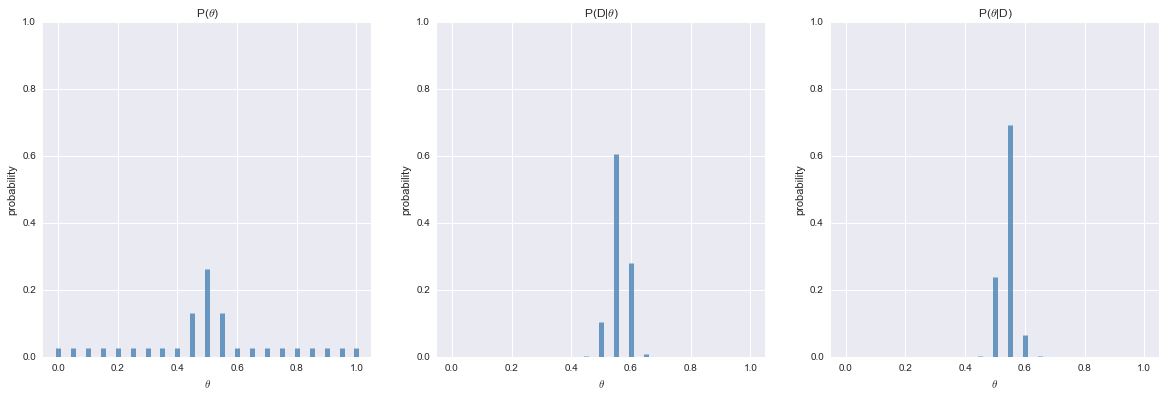

In [12]:
priors = [1 for i in xrange( 0, 21)]
priors[  9] = 5
priors[ 10] = 10
priors[ 11] = 5
normalizer = sum( priors)
priors = [ x / normalizer for x in priors]
print "priors"
for t, p in zip( thetas, priors):
    print t, p

posteriors = [ p * l for p, l in zip(priors, likelihoods)]
normalizer = sum( posteriors)
posteriors = [ x / normalizer for x in posteriors]
print "posteriors"
for t, p in zip( thetas, posteriors):
    print t, p

figure = plt.figure(figsize=(20,6))

axes = figure.add_subplot(1, 3, 1)

axes = belief_plot( axes, thetas, priors, "steelblue")
axes.set_title( r"P($\theta$)")
axes.set_xlabel( r"$\theta$")
axes.set_ylabel( "probability")

axes = figure.add_subplot(1, 3, 2)

axes = belief_plot( axes, thetas, likelihoods, "steelblue")
axes.set_title( r"P(D|$\theta$)")
axes.set_xlabel( r"$\theta$")
axes.set_ylabel( "probability")

axes = figure.add_subplot(1, 3, 3)

axes = belief_plot( axes, thetas, posteriors, "steelblue")
axes.set_title( r"P($\theta$|D)")
axes.set_xlabel( r"$\theta$")
axes.set_ylabel( "probability")

With stronger beliefs in the direction of "unbiased" (as we have defined it), we have a 93.4% probability of $\theta$ being in the range $[0.45, 0.55]$. Note that although our prior beliefs affect the degree to which evidence will sway us, as long as we admit the possibility of all values, our beliefs cannot continue in the face of accumulating evidence.

Suppose we flip the coin 250 more times and get 152 heads. Using the posterior probabilities we just calculated as our new priors, we get the following results:

likelihoods
0.0 0.0
0.05 3.77106690723e-128
0.1 1.07615836424e-84
0.15 2.31758865855e-60
0.2 5.96332290793e-44
0.25 5.74110369352e-32
0.3 7.21354755558e-23
0.35 7.58511121119e-16
0.4 1.94111595774e-10
0.45 2.29063517121e-06
0.5 0.00181389166198
0.55 0.116430138363
0.6 0.626584242464
0.65 0.249809423134
0.7 0.00535667509222
0.75 3.33843669885e-06
0.8 1.93520892508e-11
0.85 1.10848636772e-19
0.9 3.63891319052e-33
0.95 4.25753953334e-59
1.0 0.0
posteriors
0.0 0.0
0.05 3.42291478104e-238
0.1 3.55702472503e-155
0.15 6.40367250812e-109
0.2 6.48815100123e-78
0.25 1.90489147555e-55
0.3 1.47381720383e-38
0.35 1.05315441471e-25
0.4 5.31645899007e-16
0.45 3.17035841027e-08
0.5 0.00357805563104
0.55 0.663320046551
0.6 0.32906995276
0.65 0.00403179354486
0.7 1.19810142986e-07
0.75 2.28063421121e-15
0.8 2.42750548776e-27
0.85 1.21885800168e-45
0.9 5.09867907231e-75
0.95 8.90632557343e-131
1.0 0.0


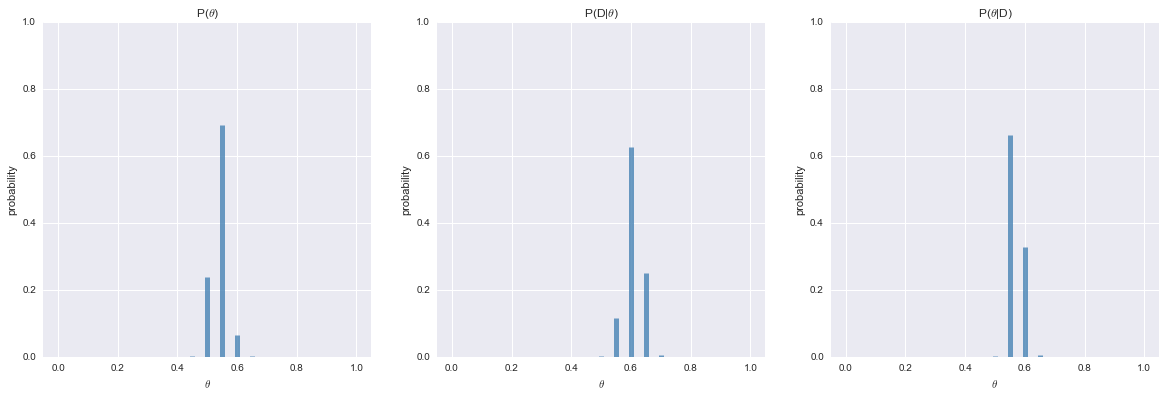

In [13]:
from copy import deepcopy

likelihoods = [stats.binom.pmf( 152, 250, x) for x in thetas]
normalizer = sum( likelihoods)
likelihoods = [ x / normalizer for x in likelihoods]
print "likelihoods"
for t, l in zip( thetas, likelihoods):
    print t, l

priors = deepcopy( posteriors)

posteriors = [ p * l for p, l in zip(priors, likelihoods)]
normalizer = sum( posteriors)
posteriors = [ x / normalizer for x in posteriors]
print "posteriors"
for t, p in zip( thetas, posteriors):
    print t, p

figure = plt.figure(figsize=(20,6))

axes = figure.add_subplot(1, 3, 1)

axes = belief_plot( axes, thetas, priors, "steelblue")
axes.set_title( r"P($\theta$)")
axes.set_xlabel( r"$\theta$")
axes.set_ylabel( "probability")

axes = figure.add_subplot(1, 3, 2)

axes = belief_plot( axes, thetas, likelihoods, "steelblue")
axes.set_title( r"P(D|$\theta$)")
axes.set_xlabel( r"$\theta$")
axes.set_ylabel( "probability")

axes = figure.add_subplot(1, 3, 3)

axes = belief_plot( axes, thetas, posteriors, "steelblue")
axes.set_title( r"P($\theta$|D)")
axes.set_xlabel( r"$\theta$")
axes.set_ylabel( "probability")

It's getting more difficult to believe that the coin is fair with a probability of around 66.6% probability that the value of $\theta$ is around $[0.45, 0.55]$. Eventually, we might collect enough evidence that our priors do not matter. This is known as the tendency for data to "swamp the prior".

### [Exact Method](#Contents)

The Exact Method involves doing what we just did but with maths alone. You specify functional forms for the prior and likelihood and derive the resulting posterior formula. It rarely works out well for anything but the simplest problems either because the functions are difficult or the normalizer (usually an intergral of some sort) cannot be simplified. Because the Exact Method is so rarely applicable, I never think to use it. As Data Scientists, we have to be competent in so many different fields (visualization? statistics? machine learning?) that I find I need to lower the cognitive load by keeping to as many "one size fits most" approaches as possible in each field.

However, a discussion of the Exact Method provides a natural entry into discussing the Monte Carlo Method.

For the Bernoulli case, we picked the Binomial Distribution as a function of $\theta$ (canonically called "p"):

$$X \sim B(140; 250, p) = \binom{250}{140}p^{140}(1-p)^{110}$$

which gives us our unnormalized likelihood. When we pick a form for our likelihood, it turns out that we can make the math simpler by picking a prior that has a form for which our likelihood has an "affinity". Such a distribution is called a *conjugate* distribution. As it turns out, the conjugate distribution for the binomial distribution is the beta distribution. An additional advantage to using a conjugate prior is that the *posterior* will have the same form as the conjugate prior which means that the posterior can be used a prior for later investigations.

| Distribution | Conjugate |
|:------------:|:---------:|
| Normal       | Normal    |
| Binomial     | Beta      |
| Multinomial  | Dirichlet |

One final advantage of conjugate priors is that they can count as pseudo-observations. For example, the Beta Distribution is parameterized as follows:

$$X \sim  Beta(\alpha, \beta)$$

where $X$ is in the range $[0, 1]$ and $\alpha$ can be interpreted as the number of pseudo-successes and $\beta$ can be interpreted as the number of pseudo-failures. The following charts show how one might use the Beta Distribution as a prior for some parameter like $\theta$.

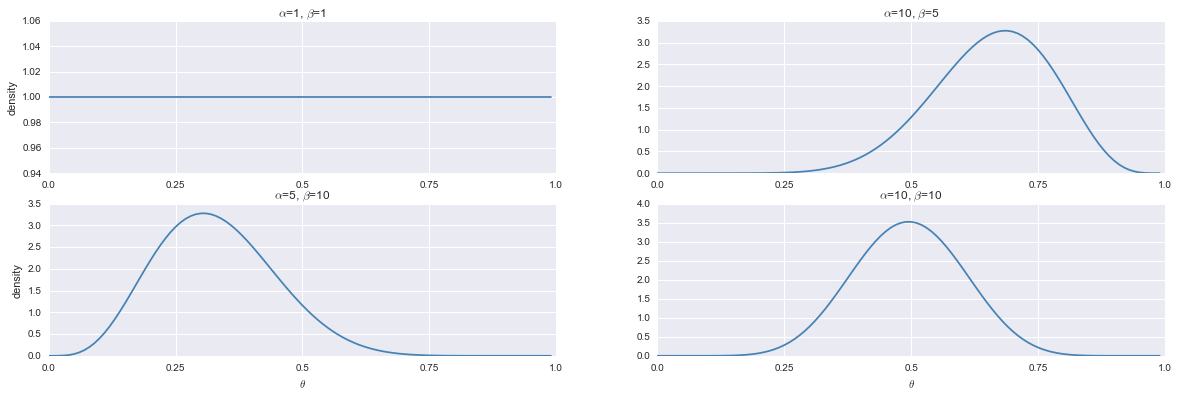

In [14]:
fig, axes = plt.subplots( nrows = 2, ncols = 2, figsize=( 20, 6))

xs = np.linspace( 0, 1, 100)

axes[ 0][ 0].plot([stats.beta.pdf( x, 1, 1) for x in xs], color="steelblue")
axes[ 0][ 0].set_title( r"$\alpha$=1, $\beta$=1")
axes[ 0][ 0].set_ylabel( "density")
axes[ 0][ 0].set_xticks([0, 25, 50, 75, 100])
axes[ 0][ 0].set_xticklabels([0.0, 0.25, 0.5, 0.75, 1.0])

axes[ 0][ 1].plot([stats.beta.pdf( x, 10, 5) for x in xs], color="steelblue")
axes[ 0][ 1].set_title( r"$\alpha$=10, $\beta$=5")
axes[ 0][ 1].set_xticks([0, 25, 50, 75, 100])
axes[ 0][ 1].set_xticklabels([0.0, 0.25, 0.5, 0.75, 1.0])

axes[ 1][ 0].plot([stats.beta.pdf( x, 5, 10) for x in xs], color="steelblue")
axes[ 1][ 0].set_title( r"$\alpha$=5, $\beta$=10")
axes[ 1][ 0].set_xticks([0, 25, 50, 75, 100])
axes[ 1][ 0].set_xticklabels([0.0, 0.25, 0.5, 0.75, 1.0])
axes[ 1][ 0].set_ylabel( "density")
axes[ 1][ 0].set_xlabel( r"$\theta$")

axes[ 1][ 1].plot([stats.beta.pdf( x, 10, 10) for x in xs], color="steelblue")
axes[ 1][ 1].set_title( r"$\alpha$=10, $\beta$=10")
axes[ 1][ 1].set_xticks([0, 25, 50, 75, 100])
axes[ 1][ 1].set_xticklabels([0.0, 0.25, 0.5, 0.75, 1.0])
axes[ 1][ 1].set_xlabel( r"$\theta$")

In the first panel, we can see that pseudo-counts of 1 success and 1 failure leads to a uniform distribution but in the fourth panel, pseudo-counts of 1 success and 1 failure leads to a peaked distribution around $\theta=0.5$. The panels on the off diagonals show what happens when the counts are skewed either towards failures or successes.

The nice thing about the Exact Method when it does work out is that we have a formula for our posterior distribution. Starting with something like:

$P(\theta|\alpha=10, \beta=10, a=140, b=110) \propto \binom{250}{140}\theta^{140}(1-\theta)^{110} * Beta( 140, 110)$

after a lot of maths, we end up with the following posterior:

$Beta( a + \alpha, b + \beta)$

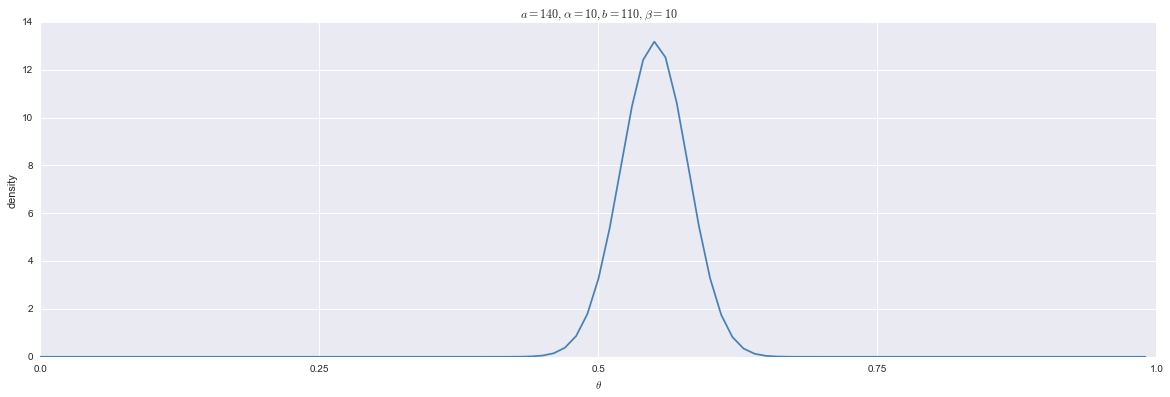

In [15]:
figure = plt.figure(figsize=(20,6))

axes = figure.add_subplot(1, 1, 1)

axes.plot([stats.beta.pdf( x, 140+10, 110+10) for x in xs], color="steelblue")
axes.set_title( r"$a=140, \alpha=10, b=110, \beta=10$")
axes.set_ylabel( "density")
axes.set_xticks([0, 25, 50, 75, 100])
axes.set_xticklabels([0.0, 0.25, 0.5, 0.75, 1.0])
axes.set_xlabel( r"$\theta$")

which looks a bit familiar, no? The main difference is that we're now dealing with a PDF and not a PMF (density).

### [Monte Carlo Method](#Contents)

This leads directly into the Monte Carlo Method. What if we could not reduce the following:

$P(\theta|\alpha=10, \beta=10, a=140, b=110) \propto \binom{250}{140}\theta^{140}(1-\theta)^{110} * Beta( 10, 10)$

into something as nice as:

$Beta( a + \alpha, b + \beta)$?

For a very long time--centuries--this not so inconsequential problem held back Bayesian Statistics from practical use. Let us start with a brief introduction to Monte Carlo Methods.

#### [Monte Carlo Simulation](#Contents)

A large number of techniques go under the name of "Monte Carlo" but they basically have one thing in common: they use a kind of random exploration as the basis for some computation. One the simplest and interesting examples of the Monte Carlo approach is to use it to estimate the value of $\pi$.

Imagine we have a unit square that enclose a unit circle and we throw darts randomly at this square. If $r$ is 1/2 the width of the square (and equal to the radius of the circle) then the area of the square is $4r^2$ and the area of the circle is $\pi r^2$. The ratio of these is:

$$\frac{\pi r^2}{4r^2} = \frac{\pi}{4}$$

This means that if you pick points at random in the square, approximately $\frac{\pi}{4}$ of them should fall in the circle. If you then multiply the ratio of the points that fall inside the circle to those in the square by 4, you should have an estimate of $\pi$:

In [16]:
from random import uniform

def estimate_pi( throws):
    hits = 0.0
    inside = []
    outside = []
    for i in xrange( 0, throws):
        x, y = uniform(-1, 1), uniform(-1,1)
        if (x**2 + y**2) <= 1:
            hits += 1.0
            inside.append((x, y))
        else:
            outside.append((x, y))
    return 4 * (hits / throws), inside, outside

In [17]:
pi, inside, outside = estimate_pi( 10)
print pi, len( inside), len( outside)

3.2 8 2


We can plot this and show what's happening graphically. Points that land inside the circle will be red and points that land outside the circle will be green.

(-1, 1)

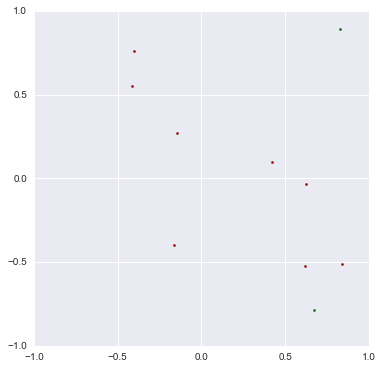

In [18]:
figure = plt.figure(figsize=(6,6))

axes = figure.add_subplot(1, 1, 1)

axes.scatter([point[ 0] for point in inside], [point[ 1] for point in inside], s=5, color="DarkRed")
axes.scatter([point[ 0] for point in outside], [point[ 1] for point in outside], s=5, color="DarkGreen")
axes.set_ylim([-1, 1])
axes.set_xlim([-1, 1])

3.2


(-1, 1)

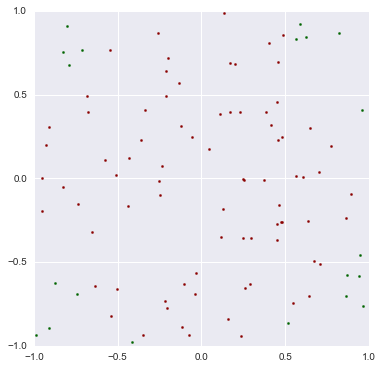

In [19]:
pi, inside, outside = estimate_pi( 100)
print pi
figure = plt.figure(figsize=(6,6))

axes = figure.add_subplot(1, 1, 1)

axes.scatter([point[ 0] for point in inside], [point[ 1] for point in inside], s=5, color="DarkRed")
axes.scatter([point[ 0] for point in outside], [point[ 1] for point in outside], s=5, color="DarkGreen")
axes.set_ylim([-1, 1])
axes.set_xlim([-1, 1])

3.12


(-1, 1)

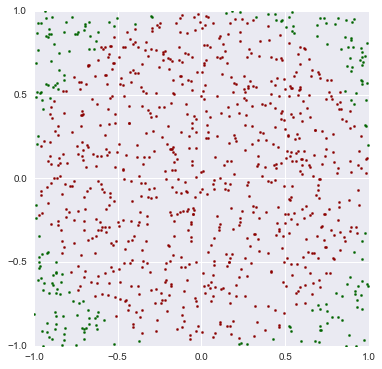

In [20]:
pi, inside, outside = estimate_pi( 1000)
print pi

figure = plt.figure(figsize=(6,6))

axes = figure.add_subplot(1, 1, 1)

axes.scatter([point[ 0] for point in inside], [point[ 1] for point in inside], s=5, color="DarkRed")
axes.scatter([point[ 0] for point in outside], [point[ 1] for point in outside], s=5, color="DarkGreen")
axes.set_ylim([-1, 1])
axes.set_xlim([-1, 1])

3.142


(-1, 1)

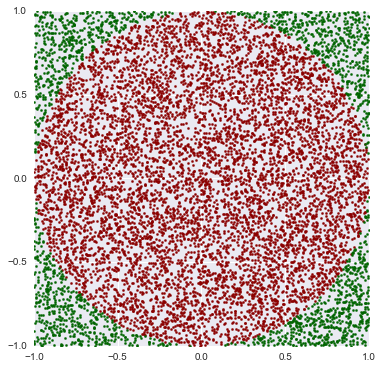

In [21]:
pi, inside, outside = estimate_pi( 10000)
print pi
figure = plt.figure(figsize=(6,6))

axes = figure.add_subplot(1, 1, 1)

axes.scatter([point[ 0] for point in inside], [point[ 1] for point in inside], s=5, color="DarkRed")
axes.scatter([point[ 0] for point in outside], [point[ 1] for point in outside], s=5, color="DarkGreen")
axes.set_ylim([-1, 1])
axes.set_xlim([-1, 1])

We can do something similar if we can specify the form of the posterior distribution. This is also often done using a likelihood and its conjugate distribution. As we saw previously, the posterior distribution for the current problem has the following form:

$Beta( a + \alpha, b + \beta)$

Given our values for $a$, $\alpha$, $b$ and $\beta$, we can parameterize the posterior distribution directly and sample from it.

mean 0.556353676823


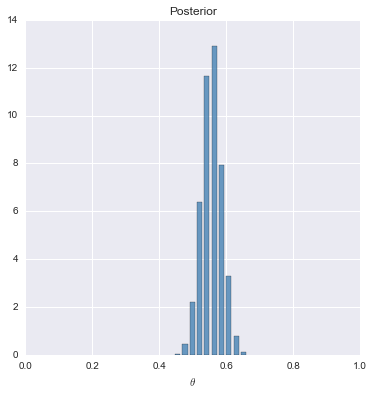

In [22]:
from numpy.random import beta as beta_dist

samples = 10000

alpha = 10.0
beta = 10.0
a = 140
b = 110

sample_thetas = beta_dist( a + alpha, b + beta, samples)
print "mean", np.mean( sample_thetas)

ys, bins = np.histogram( sample_thetas, bins=10, density=True)
width = 0.7*(bins[ 1] - bins[ 0])
center = (bins[ :-1]+bins[1:])/2

figure = plt.figure(figsize=(6,6))

axes = figure.add_subplot(1, 1, 1)

axes.bar( center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([0, 1])
axes.set_xlabel( r"$\theta$")
axes.set_title( "Posterior")

The great thing about this approach is that it is very easy to ask and answer questions. Each instance in the `samples` variable is one simulation of flipping a coin that is consistent with the parameters we've specified. This makes it very easy to answer questions like, how often is $\theta$ between $[0.45, 0.55]$?

In [23]:
print np.mean((0.45 <= sample_thetas) & (sample_thetas <= 0.55))

0.4145


For more complicated cases, we would actually need to do Markov Chain Monte Carlo Simulations.

#### [Markov Chain Monte Carlo Simulation](#Contents)

Markov Chain Monte Carlo (MCMC) Simulation is a bit more complicated that vanilla Monte Carlo estimation. Image taking the prior and sampling a value of $\theta$ from it at random and then using that $\theta$ to parameterize a likelihood function and sampling 250 trials from it. Do this thousands of times and you have the data necessary to compute the posterior distribution. The technique is immensely powerful, even beyond statistical inference to Bayesian modeling. However, it requires an additional library and is a bit beyond the scope of this module.

### [Bootstrap Methods](#Contents)

At their heart, Bootstrap Methods are a resampling technique. The data we observe is but one outcome of the system we're observing. If we were to take these measurements again--flip the euro 250 times--we might observe a different count of heads and tails.

Resampling treats the data we have as a pool of data to sample from. Imagine what we have all the heads and tails as data before us:

In [24]:
from random import shuffle

original_data = [1] * 140 + [0] * 110
shuffle( original_data) # this is not strictly necessary but looks better.
print original_data[0:20]
print "heads", np.sum( original_data)
print "theta", np.mean( original_data)

[1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1]
heads 140
theta 0.56


A *resampling* of this data involves creating a new sample from the original data of the same size by randomly picking individual data points *with replacement*.

In [25]:
import random

def resample( data):
    n = len( data)
    return [ data[ i] for i in [random.randint(0, n - 1) for _ in xrange( 0, n)]]

In [26]:
new_sample = resample(original_data)
print new_sample[0:20]
print "heads", np.sum( new_sample)
print "theta", np.mean( new_sample)

[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1]
heads 134
theta 0.536


If we do this many times, we will have a bootstrap sample of $\theta$. While the Bootstrap Method can have either a Frequentist or Bayesian interpretation. We will stick with the Bayesian one. Because we are sampling from the data directly, this is the Non-Parametric Bootstrap. Since we are not starting any particular prior distribution (which we could do), we assuming a uniform prior for $\theta$. As noted previously under "swamping the prior" this assumption means less the more data we have.

Let us apply the Non-Parametric to our current problem. It is largely the same as the Monte Carlo Method except that the observations come not from random sampling from the likelihood but from the bootstrap samples.

[ 0.544  0.54   0.536  0.52   0.604  0.58   0.552  0.576  0.576  0.6    0.544
  0.532  0.592  0.556  0.536  0.596  0.552  0.552  0.532  0.544]
mean 0.5602316


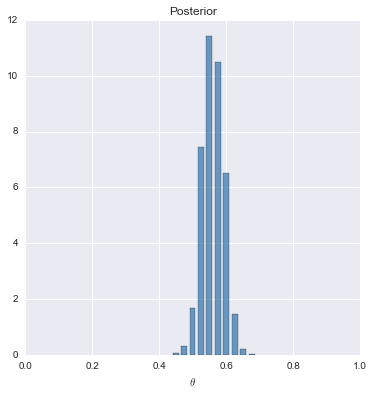

In [27]:
sample_thetas = np.array( [np.mean( sample) for sample in [resample( original_data) for i in xrange( 0, 10000)]])
print sample_thetas[ 0:20]
print "mean", np.mean( sample_thetas)

ys, bins = np.histogram( sample_thetas, bins=10, density=True)
width = 0.7*(bins[ 1] - bins[ 0])
center = (bins[ :-1]+bins[1:])/2

figure = plt.figure(figsize=(6,6))

axes = figure.add_subplot(1, 1, 1)

axes.bar( center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([0, 1])
axes.set_xlabel( r"$\theta$")
axes.set_title( "Posterior")

Notice that the result is almost exactly the same as the Monte Carlo one.

### [Reporting in Bayesian Inference](#Contents)

One of the great advantages of Bayesian inference is that you have a rich set of statistics to work with. You have the entire posterior probability distribution over all possible values of the parameters.

Unfortunately, people don't generally want an entire probability distributions but some kind of summary. Possible candidates might include:

1. Any conclusion that is directly relevant to the question you were tasked with answering. For example, if you were asked to determine if the coin was biased, you can report the probability that $\theta > 0.55$ (if the data was skewed that way or the probability that $\theta < 0.45$ if it was skewed the other way.
2. You can report a *credible interval* or the *Bayesian confidence interval* for some cut off. For example, you might report the range of values that contain 95% or 80% or 50% of the probability.

We've already reported on a few of these before. You don't want to report on *everything* either...just enough to support a decision. You should also record, perhaps in a footnote, any assumptions you made, sensitivity analysis you did, and any parameter values.

One of the other great advantages of Bayesian Methods (and resampling methods generally) is that we can report confidence intervals on other kinds of statistics, for example, the median.

In [28]:
print "50% CI", stats.mstats.mquantiles( sample_thetas, [0.25, 0.75])
print "80% CI", stats.mstats.mquantiles( sample_thetas, [0.10, 0.90])
print "95% CI", stats.mstats.mquantiles( sample_thetas, [0.025, 0.975])
print "P(theta > 55%)", np.mean(sample_thetas > 0.55)
print "P(theta < 45%)", np.mean(sample_thetas < 0.45)
print "P(45% <= theta <= 55%)", np.mean((0.45 <= sample_thetas) & (sample_thetas <= 0.55))

50% CI [ 0.54  0.58]
80% CI [ 0.52  0.6 ]
95% CI [ 0.5   0.62]
P(theta > 55%) 0.6275
P(theta < 45%) 0.0003
P(45% <= theta <= 55%) 0.3722


## [Common Problems in Statistical Inference](#Contents)

Our concern that the Exact Method might be "too hard" is probably misplaced when it comes to Statistical Inference. There are really only a handful of problems that we encounter on a regular basis:

1. **Compare two boolean parameters** For example, the purchase rate for A and the purchase rate for B or the cure rate for A and the cure rate for B). Very often, what we are interested in in this case is the difference in rates or *lift*.
2. **Compare two real valued parameters, usually means** For example, average purchase amount for A and the average purchase amount for B).
3. **Compare a single boolean parameter to some hypothesized value** For example, we might believe or have heard that our open rate is 10%. We might need to do a study to find out if that is true).
4. **Compare a single real valued parameter to some hypothesized value** For example, we might have a machine with specs a tolerance of $\frac{1}{10}$ of an inch. We might need to do a study to find out if that is true.

We will cover each of these in turn using the Non-Parametric Bayesian Bootstrap.

### [Comparing two boolean $\theta$s](#Contents)

This sort of comparison--between two rates--happens a lot which we will see later in the semester. During the course of your exploratory data analysis (EDA) you may find what appears to be a relationship between purchases by women as opposed to men. Say, woman purchase at a rate of 1.7% and men purchase at a rate of 1.3%.

There are two things to ask yourself. Is the difference *meaningful*? Does it make a difference to your business, research, outreach, organizational goal that the women's rate is 30.7% higher than the men's? The second question is, how *believable* is it? You might have three years of data. Is your calculation from all three years of data? The last month? There's a trade-off between using a lot of data to calculate a parameter and the parameter having been changing over the course of time. After all, this analysis is situated in an evolving, stochastic process.

Statistical inference deals only with the believability of a result. It is up to the stakeholders to decide if the result is meaningful. As Spock said, "a difference that makes no difference is no difference."

The examples that follow come are very stock statistical inference problems but we will be solving them using Non-Parameteric Bayesian Bootstrap.

Suppose we have a drug, Smokestopperin, that we want to test. We randomly assign pack-a-day smokers to two groups. The control group receives a placebo and the treatment group receives 10mg capsules of the drug. After 90 days, we compare the results (We will talk about experimental design later in the semester).

In [29]:
smoking = {}
smoking[ "control"] = np.array([1] * 25 + [0] * 35)
smoking[ "treatment"] = np.array([1] * 35 + [0] * 15)
print "control", np.mean( smoking[ "control"])
print "treatment", np.mean( smoking[ "treatment"])

control 0.416666666667
treatment 0.7


It would appear that the treatment is very effective. The difference is *meaningful* but is it believable? We will now turn to that question.

We're going to start by resampling each of the groups data and calculating the *rate* which is just the average of the booleans for each resampling.

In [30]:
smoking[ "control_resample"] = np.array([np.mean( data) for data in [resample( smoking[ "control"]) for i in xrange( 0, 10000)]])
smoking[ "treatment_resample"] = np.array([np.mean( data) for data in [resample( smoking[ "treatment"]) for i in xrange( 0, 10000)]])

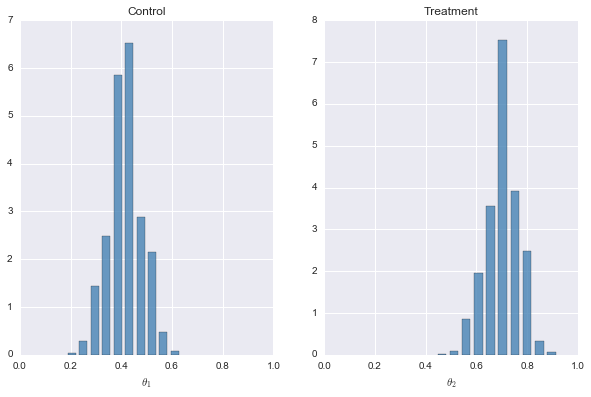

In [31]:
ys, bins = np.histogram( smoking[ "control_resample"], bins=10, density=True)
width = 0.7*(bins[ 1] - bins[ 0])
center = (bins[ :-1]+bins[1:])/2

figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1, 2, 1)

axes.bar( center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([0, 1])
axes.set_xlabel( r"$\theta_1$")
axes.set_title( "Control")

ys, bins = np.histogram( smoking[ "treatment_resample"], bins=10, density=True)
width = 0.7*(bins[ 1] - bins[ 0])
center = (bins[ :-1]+bins[1:])/2

axes = figure.add_subplot(1, 2, 2)

axes.bar( center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([0, 1])
axes.set_xlabel( r"$\theta_2$")
axes.set_title( "Treatment")

The plots above show the posterior distributions for the two parameters, the smoking cessation rates of the placebo and Smokestopperin but what we really want to see is the *difference*. No problem! We have our resamples of the rates, we can calculate and plot the differences.

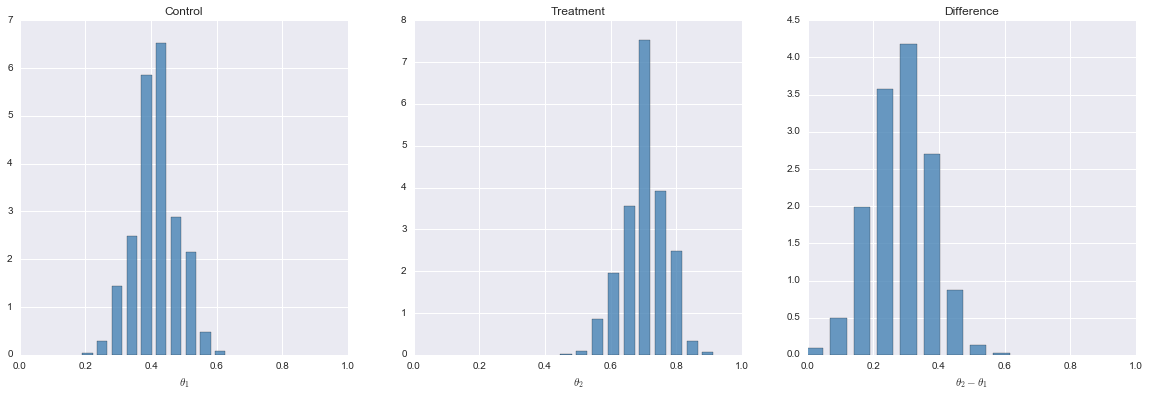

In [32]:
smoking[ "difference"] = smoking[ "treatment_resample"] - smoking[ "control_resample"]

ys, bins = np.histogram( smoking[ "control_resample"], bins=10, density=True)
width = 0.7*(bins[ 1] - bins[ 0])
center = (bins[ :-1]+bins[1:])/2

figure = plt.figure(figsize=(20,6))

axes = figure.add_subplot(1, 3, 1)

axes.bar( center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([0, 1])
axes.set_xlabel( r"$\theta_1$")
axes.set_title( "Control")

ys, bins = np.histogram( smoking[ "treatment_resample"], bins=10, density=True)
width = 0.7*(bins[ 1] - bins[ 0])
center = (bins[ :-1]+bins[1:])/2

axes = figure.add_subplot(1, 3, 2)

axes.bar( center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([0, 1])
axes.set_xlabel( r"$\theta_2$")
axes.set_title( "Treatment")

ys, bins = np.histogram( smoking[ "difference"], bins=10, density=True)
width = 0.7*(bins[ 1] - bins[ 0])
center = (bins[ :-1]+bins[1:])/2

axes = figure.add_subplot(1, 3, 3)

axes.bar( center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([0, 1])
axes.set_xlabel( r"$\theta_2 - \theta_1$")
axes.set_title( "Difference")

Ideally, we would have defined what we meant by a "meaningful" difference when we'd set up the experiment and what we report on will be influenced by this. If we stated that a meaningful difference was at least 20 points difference, then we can report on the probability that the difference is greater than 20 points:

In [33]:
print "P(difference > 20 points)", np.mean( smoking[ "difference"] > 0.20)

P(difference > 20 points) 0.8163


One calculation that is commonly reported is the 95% CI (credible interval) or BCI (Bayesian Confidence Interval). The BCI is what you *think* the Frequentist *confidence interval* means. Bayesian statistics eschews reporting point estimates but they can be shown as well. There are a lot more options with Bayesian statistics. For example, depending on the cost of Stopsmokerin and the cost of not quitting smoking we might be interested in other intervals. If the cost of Stopsmokerin is low and the cost of not quitting is very high, we could even be interested in an "even bet" such as the 50% CI.

In [34]:
print "95% CI", stats.mstats.mquantiles( smoking[ "difference"], [0.025, 0.975])

95% CI [ 0.10666667  0.46      ]


### [Comparing two real valued $\theta$s](#Contents)

Another common problem in statistical inference involves the two (or more) *real valued* parameters, $\theta$s. Interestingly enough while other approaches to Bayesian (and Frequentist) statistics would require you to use a different tool from the boolean approach, the Bootstrap does not (at least this version of it...if you want to use a prior, you'll have to do it slightly differently). The process is the same.

Imagine a biologist is trying to discover whether the bacteria *acidophilus* or *bulgarius* is a better starter culture for yogurt measured in hours to ripen.

In [35]:
yogurt = {}
yogurt[ "acidophilus"] = np.array( [6.8, 6.3, 7.4, 6.1, 8.2, 7.3, 6.9])
yogurt[ "bulgarius"] = np.array([6.1, 6.4, 5.7, 5.5, 6.9, 6.3, 6.7])

print "acidophilus", np.mean( yogurt[ "acidophilus"])
print "bulgarius", np.mean( yogurt[ "bulgarius"])

acidophilus 7.0
bulgarius 6.22857142857


Again, in general, we need to have asked ourselves what difference is meaningful *in advance* of the experiment or collection of data or analysis of the data. Once we have the data, if we find a meaningful difference, we can ask ourselves if it is believable...but these are made up problems. Let's assume that when you're making thousands of gallons of yogurt at a time, an hour is meaningful.

Currently, we see that the difference is less than hour. Is it believable? We thought that bulgarius would at least do as well as acidophilus and maybe even better (otherwise, why do the study?). Because we've already developed the individual steps, I'm going to do the graphing portion of the analysis all at once:

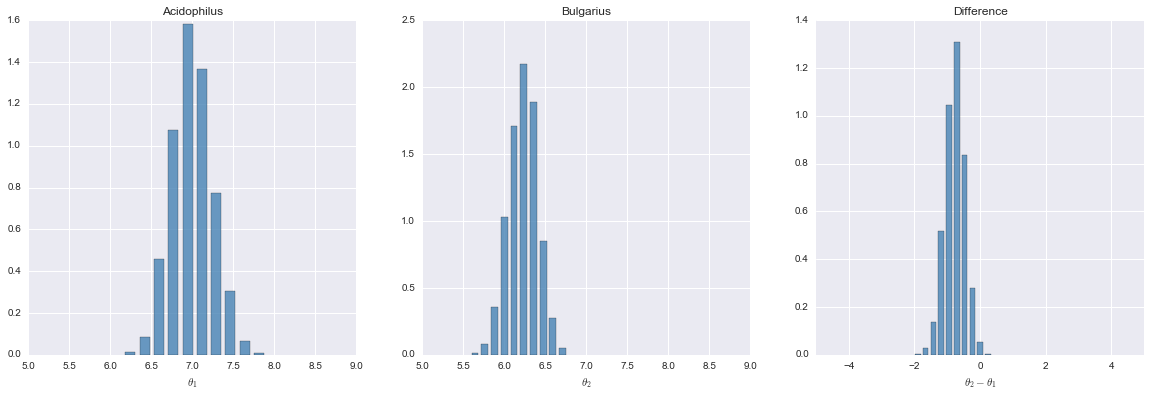

In [36]:
yogurt[ "acidophilus_resample"] = np.array([np.mean( data) for data in [resample( yogurt[ "acidophilus"]) for i in xrange( 0, 10000)]])
yogurt[ "bulgarius_resample"] = np.array([np.mean( data) for data in [resample( yogurt[ "bulgarius"]) for i in xrange( 0, 10000)]])

yogurt[ "difference"] = yogurt[ "bulgarius_resample"] - yogurt[ "acidophilus_resample"]

ys, bins = np.histogram( yogurt[ "acidophilus_resample"], bins=10, density=True)
width = 0.7*(bins[ 1] - bins[ 0])
center = (bins[ :-1]+bins[1:])/2

figure = plt.figure(figsize=(20,6))

axes = figure.add_subplot(1, 3, 1)

axes.bar( center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([5, 9])
axes.set_xlabel( r"$\theta_1$")
axes.set_title( "Acidophilus")

ys, bins = np.histogram( yogurt[ "bulgarius_resample"], bins=10, density=True)
width = 0.7*(bins[ 1] - bins[ 0])
center = (bins[ :-1]+bins[1:])/2

axes = figure.add_subplot(1, 3, 2)

axes.bar( center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([5, 9])
axes.set_xlabel( r"$\theta_2$")
axes.set_title( "Bulgarius")

ys, bins = np.histogram( yogurt[ "difference"], bins=10, density=True)
width = 0.7*(bins[ 1] - bins[ 0])
center = (bins[ :-1]+bins[1:])/2

axes = figure.add_subplot(1, 3, 3)

axes.bar( center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([-5.0, 5.0])
axes.set_xlabel( r"$\theta_2 - \theta_1$")
axes.set_title( "Difference")

We can now report on the distribution of differences as before.

In [37]:
print "P(difference > 1 hour)", np.mean( yogurt[ "difference"] < -1.)
print "95% CI", stats.mstats.mquantiles( yogurt[ "difference"], [0.025, 0.975])

P(difference > 1 hour) 0.2154
95% CI [-1.35714286 -0.18571429]


You have to be careful of the signs here. *Bulgarius* ripens quicker so a larger negative number is *better*.

One of the disadvantages of the Non-Parametric Bayesian Bootstrap is that you will sometimes come up with a zero probability for some events (or certainty for others). These should be interpreted with caution. While the probability of negative height is truly zero, we should make sure that any event that is shown to have a zero probability is truly impossible.

One final caution...as a rule of thumb, the Bootstrap is best used with data that has at least 30 observations for each group.

### [Comparing a boolean $\theta$ with a hypothesized value](#Contents)

This case and the following case are often the ones that statistics textbooks start with. I think this is because statistics as we generally know it, especially Frequentist statistics, started with industrial processes. For example, the specs say this machine should have a defect rate of 1.2%. For the last run, based on a random sample, we saw a defect rate of 1.7%. Should we stop the line and fix the machine?

But I generally find that these examples completely confuse many students. Where did the 1.2% come from? How did we get 1.7%?

Another way of looking at this kind of problem is that someone made a claim about the world: that the machine had a 1.2% defect rate, and we want to verify it. This could just as easily be a marketing person saying our company has a 1.1% purchase rate or a drug company saying their drug is 73% effective. We may want to look at the data and determine if this is true.

There are a number of ways this can be handled in Bayesian Statistics. For example, we might use our beliefs about the hypothesized value as a prior. Since we're using the Non-Parametric Bootstrap Method, we'll just report our results relative to this value.

Suppose we're told that a drug is 73% effective at treating some condition in 21 days or less. We start using it in our practice. Over the course of a few years, we notice that while on paper this drug has the highest effectiveness, we often have to switch to a different drug for our patients. We go back through our charts since the drug was introduced and compile the following data:

In [38]:
drug = {}
drug[ "data"] = np.array( [1] * 139 + [0] * 67)
print "effectiveness", np.mean( drug[ "data"])

effectiveness 0.674757281553


Hmm, 67% isn't *that* far off from 73%. It could be that we're just remembering all the the times because we had a 2nd visit from the patient, had to write a 2nd prescription, etc. Whether this difference is meaningful would depend on whether or not there are other treatments, their cost, their effectiveness, what happens if the condition is not treated (does it just become chronic? can you be treated multiple times)?

We'll side step these here but they are the *most* important questions.

Here's a basic Bootstrapping and summary of our findings:

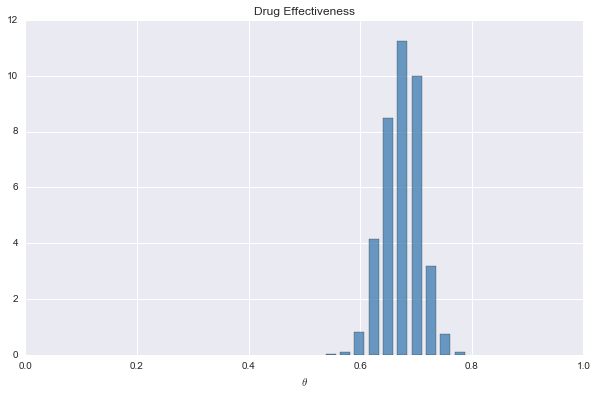

In [39]:
drug[ "resample"] = np.array([np.mean( data) for data in [resample( drug[ "data"]) for i in xrange( 0, 10000)]])

ys, bins = np.histogram( drug[ "resample"], bins=10, density=True)
width = 0.7*(bins[ 1] - bins[ 0])
center = (bins[ :-1]+bins[1:])/2

figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1, 1, 1)

axes.bar( center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([0, 1])
axes.set_xlabel( r"$\theta$")
axes.set_title( "Drug Effectiveness")

In [40]:
print "P(effectiveness > 73%)", np.mean( drug[ "resample"] >= 0.73)
print "P(70% <= effectiveness <= 76%)", np.mean((0.7 <= drug[ "resample"]) & (drug[ "resample"] <= 0.76))
print "P(effective > 70%)", np.mean( 0.7 <= drug[ "resample"])
print "P(effective < 70%)", np.mean( drug[ "resample"] <= 0.7)
print "95% CI", stats.mstats.mquantiles( drug[ "resample"], [0.025, 0.975])

P(effectiveness > 73%) 0.0401
P(70% <= effectiveness <= 76%) 0.2036
P(effective > 70%) 0.2074
P(effective < 70%) 0.7926
95% CI [ 0.61165049  0.73786408]


If we take 73% as our benchmark, we can see that there's only a 4.2% probability that the drug is at least 73% effective based our data but that's pretty stringent. If we want to look "around" 73% say, 70-76%, then there is only a 20% our drug is effective "around" 73%. If we look more closely, though, we can see that there's a 79.4% probability the drug is 70% effective or better. The 95% CI is 61.2-73.8% effective.

This problem illustrates the richness of Bayesian over Frequentists approaches to statistical inference.

### [Comparing a real valued $\theta$ with a hypothesized value](#Contents)

As one might imagine, the above situation arises for real valued measurements as well as for boolean outcomes.

A company advertises the breaking strength of the wire it manufacturers as 75N (Newtons). A customer takes 9 different rolls of wire and tests their breaking strength.

In [41]:
wire = {}
wire[ "data"] = np.array([ 72.1, 74.5, 72.8, 75, 73.4, 75.4, 76.1, 73.5, 74.1])
np.mean( wire[ "data"])

74.099999999999994

Did the customer get a bad batch? Is the manufacturer misrepresenting its product?

Here we need a bit of domain knowledge--which I don't have--how many Newtons are important? You need to start by identifying the meaningful difference. Now let's see if it's believable, based on the data.

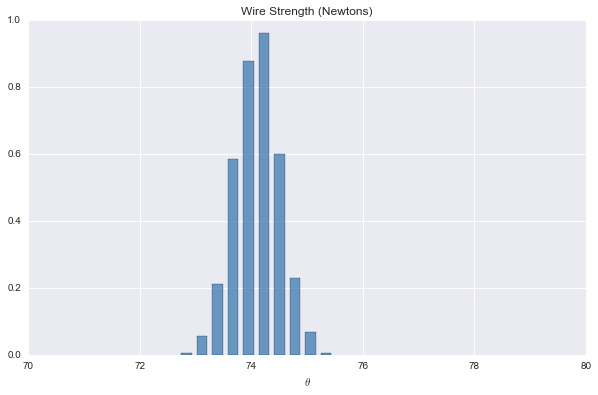

In [42]:
wire[ "resample"] = np.array([np.mean( data) for data in [resample( wire[ "data"]) for i in xrange( 0, 10000)]])

ys, bins = np.histogram( wire[ "resample"], bins=10, density=True)
width = 0.7*(bins[ 1] - bins[ 0])
center = (bins[ :-1]+bins[1:])/2

figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1, 1, 1)

axes.bar( center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([70.0, 80.0])
axes.set_xlabel( r"$\theta$")
axes.set_title( "Wire Strength (Newtons)")

What is the summary?

In [43]:
print "P(strength >= 75N)", np.mean( wire[ "resample"] >= 75)
print "95% CI", stats.mstats.mquantiles( wire[ "resample"], [0.025, 0.975])

P(strength >= 75N) 0.012
95% CI [ 73.31111111  74.88888889]


Again, it depends on the use whether the difference is meaningful (and thus the comparison is valid) but if we assume that very small values in Newtons are important, there is a very, very low probability, based on the data, that the average strength is 75N.

## [Summary](#Contents)

In this notebook we have described several of the Bayesian Methods to statistical inference:

1. Grid Method
2. Exact Method
3. Monte Carlo Method
4. Bootstrap Method

We also talked briefly about summarizing the results of a statistical inference.

Finally, we looked at four problems that come up very often in statistical inference:

1. Comparing two boolean $\theta$s.
2. Comparing two real valued $\theta$s.
3. Comparing a boolean $\theta$ to a hypothesized value.
4. Comparing a real valued $\theta$ to a hypothesized value.

For first two, the $theta$s often come from either one or groups in your data or as we shall see later, two or more results when comparing two models. For the last two, the hypothesized value might come from a suggestion, a past value or an idealized value.

We didn't cover everything. Bayesian statistics is very deep and can be applied to a lot of different problems. The main thing we did not cover is model *checking*. We are, in essence, building a model of our $theta$ using the posterior distribution calculated from the data. We generally want to test all of our models, even models of statistical inference. You can find out more in the appropriate References section of the Syllabus.